## Deuflhard Function

In [1]:
using Pkg
Pkg.activate("../../.")
using Globtim
using DynamicPolynomials, DataFrames
using ProgressLogging
using CairoMakie
CairoMakie.activate!

  Activating project at `~/globtim`


activate! (generic function with 1 method)

In [ ]:
# Constants and Parameters
const n, a, b = 2, 11, 10
const scale_factor = a / b   # Scaling factor appears in `main_computation`, maybe it should be a parameter.
# const delta, alpha = 0.5, 1 / 10  # Sampling parameters
# const tol_l2 = 3e-4            # Define the tolerance for the L2-norm
f = Deuflhard # Objective function

Deuflhard (generic function with 1 method)

In [9]:
d = 8 # Initial Degree 
SMPL = 60 # Number of samples
center = [0.0, 0.0]
TR = test_input(f,
    dim=n,
    center=[0.0, 0.0],
    GN=SMPL,
    sample_range=scale_factor,
    tolerance=tol_l2
)
pol_cheb = Constructor(TR, d, basis=:chebyshev)
pol_lege = Constructor(TR, d, basis=:legendre);
@polyvar(x[1:n]); # Define polynomial ring 

current L2-norm: 0.8445207739921312
current L2-norm: 0.7386292313191875


In [4]:
real_pts_cheb = solve_polynomial_system(x, TR.dim, pol_cheb.degree, pol_cheb.coeffs; basis=:chebyshev, bigint=true)
real_pts_lege = solve_polynomial_system(x, TR.dim, pol_lege.degree, pol_lege.coeffs; basis=:legendre, bigint=true)
df_cheb = process_critical_points(real_pts_cheb, f, TR)
df_lege = process_critical_points(real_pts_lege, f, TR)

Dimension m of the vector space: 45
Tracking 49 paths...   4%|█▎                            |  ETA: 0:01:22



Tracking 49 paths... 100%|██████████████████████████████| Time: 0:00:03
  # paths tracked:                  49
  # non-singular solutions (real):  49 (9)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         49 (9)
Dimension m of the vector space: 45
Tracking 49 paths...   4%|█▎                            |  ETA: 0:00:34



Tracking 49 paths...  45%|█████████████▌                |  ETA: 0:00:02



Tracking 49 paths...  92%|███████████████████████████▌  |  ETA: 0:00:00



Tracking 49 paths... 100%|██████████████████████████████| Time: 0:00:01
  # paths tracked:                  49
  # non-singular solutions (real):  49 (13)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         49 (13)

=== Starting Critical Points Processing (dimension: 2) ===
Processed 9 points (0.046s)

=== Starting Critical Points Processing (dimension: 2) ===


Row,x1,x2,z
,Float64,Float64,Float64
1,-0.376399,0.983094,0.132156
2,-0.618667,0.884567,0.245044
3,0.394832,0.394832,2.67881
4,-0.770386,0.770386,0.0768416
5,0.983094,-0.376399,0.132156
6,0.376399,-0.983094,0.132156
7,0.770386,-0.770386,0.0768416
8,-0.394832,-0.394832,2.67881
9,0.618667,-0.884567,0.245044


In [5]:
using Optim
df_cheb, df_min_cheb = analyze_critical_points(f, df_cheb, TR, tol_dist=0.05)
df_lege, df_min_lege = analyze_critical_points(f, df_lege, TR, tol_dist=0.05)

Processing point 1 of 9
Optimization has converged within bounds: ✓
Processing point 2 of 9
Optimization has converged within bounds: ✓
Processing point 3 of 9
Optimization has converged within bounds: ✓
Processing point 4 of 9
Optimization has converged within bounds: ✓
Processing point 5 of 9
Optimization has converged within bounds: ✓
Processing point 6 of 9
Optimization has converged within bounds: ✓
Processing point 7 of 9
Optimization has converged within bounds: ✓
Processing point 8 of 9
Optimization has converged within bounds: ✓
Processing point 9 of 9
Optimization has converged within bounds: ✓
Processing point 1 of 13
Optimization has converged within bounds: ✓
Processing point 2 of 13
Optimization has converged within bounds: ✓
Processing point 3 of 13
Optimization has converged within bounds: ✓
Processing point 4 of 13
Optimization has converged within bounds: ✓
Processing point 5 of 13
Optimization has converged within bounds: ✓
Processing point 6 of 13
Optimization has c

(13×8 DataFrame
 Row │ x1            x2            z          y1            y2            clos ⋯
     │ Float64       Float64       Float64    Float64       Float64       Bool ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ -0.376399      0.983094     0.132156   -0.256625      1.01625      fals ⋯
   2 │ -0.618667      0.884567     0.245044   -0.741152      0.741152     fals
   3 │  0.394832      0.394832     2.67881     0.459896      0.459896     fals
   4 │ -0.770386      0.770386     0.0768416  -0.741152      0.741152      tru
   5 │  0.983094     -0.376399     0.132156    1.01625      -0.256625     fals ⋯
   6 │  0.376399     -0.983094     0.132156    0.256625     -1.01625      fals
   7 │  0.770386     -0.770386     0.0768416   0.741152     -0.741152      tru
   8 │ -0.394832     -0.394832     2.67881    -1.01625       0.256625     fals
   9 │  0.618667     -0.884567     0.245044    0.741152     -0.741152     fals ⋯
  10 │  0.884567     -0.

In [6]:
x1_range = range(-1, 1, length=100)
x2_range = range(-1, 1, length=100)

# Create surface plot
# f1(x1_val, x2_val) = Float64(w_d(x1_val, x2_val))
# f2(x1_val, x2_val) = Float64(w_d_missing_samples(x1_val, x2_val))

# Create matrix of z values
z1 = [f([x1_val, x2_val]) for x1_val in x1_range, x2_val in x2_range];
# z2 = [f2(x1_val, x2_val) for x1_val in x1_range, x2_val in x2_range];

100×100 Matrix{Float64}:
 24.4595   22.1725   20.1796   18.4441   …  14.6492   16.8063   19.2638
 22.1725   20.137    18.3677   16.8308      12.6677   14.6001   16.8063
 20.1796   18.3677   16.7967   15.4355      10.9358   12.6677   14.6492
 18.4441   16.8308   15.4355   14.2295       9.4238   10.9763   12.7569
 16.9335   15.4964   14.2566   13.1876       8.10555   9.4976   11.098
 15.6193   14.3384   13.2359   12.2874   …   6.95798   8.20621   9.64496
 14.4761   13.3334   12.352    11.5093       5.96076   7.07995   8.37349
 13.4815   12.4608   11.586    10.836        5.09594   6.09919   7.26207
 12.6156   11.7026   10.9211   10.252        4.34767   5.24655   6.29168
 11.8609   11.0424   10.3427    9.7438       3.70187   4.50666   5.44548
  ⋮                                      ⋱                      
  6.29168   5.24655   4.34767   3.5771      10.9211   11.7026   12.6156
  7.26207   6.09919   5.09594   4.23288     11.586    12.4608   13.4815
  8.37349   7.07995   5.96076   4.99477   

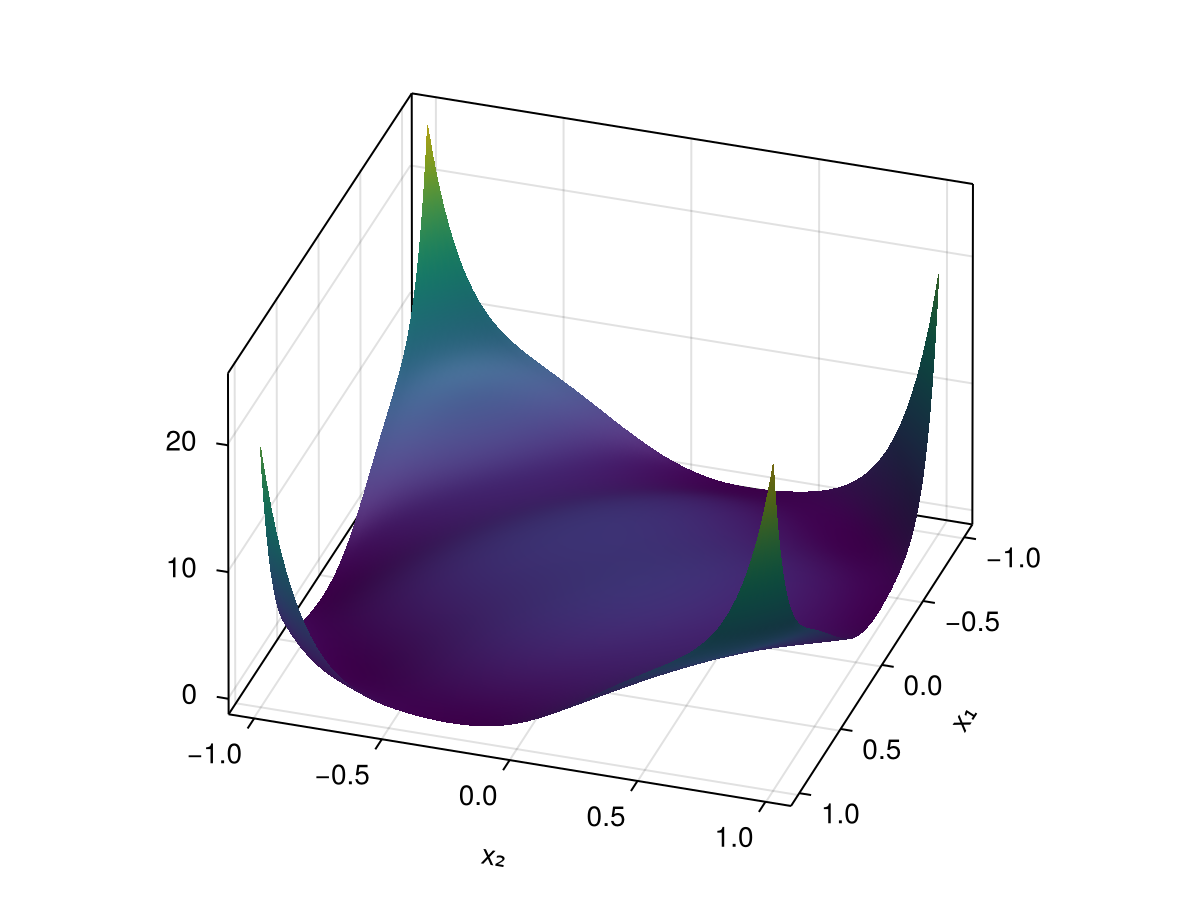

CairoMakie.Screen{IMAGE}


In [7]:
fig_3 = Figure()
ax = Axis3(fig_3[1, 1], xlabel="x₁", ylabel="x₂", zlabel="", azimuth=0.1π, elevation=π / 6)
surface!(ax, x1_range, x2_range, z1)
# min_z = minimum(z1)
# surface!(ax, x_range, y_range, fill(min_z, length(x_range), length(y_range)), color=:orange, transparency=true)
display(fig_3)


In [8]:
# GLMakie.closeall()